In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Show and clean.

customer = pd.read_csv('marketing_customer_analysis.csv')

# Lab | Customer Analysis Round 4

##### 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [ ]:
customer.dtypes

In [28]:
cus_num = customer.select_dtypes(include = np.number)


In [ ]:
cus_cat = customer.select_dtypes(include = np.object)


##### 2. Now we will try to check the normality of the numerical variables visually
##### 2. 1 Use seaborn library to construct distribution plots for the numerical variables

In [ ]:
# Check 1

for col in cus_num:
    sns.displot(cus_num[col])

##### 2.2 Use Matplotlib to construct histograms

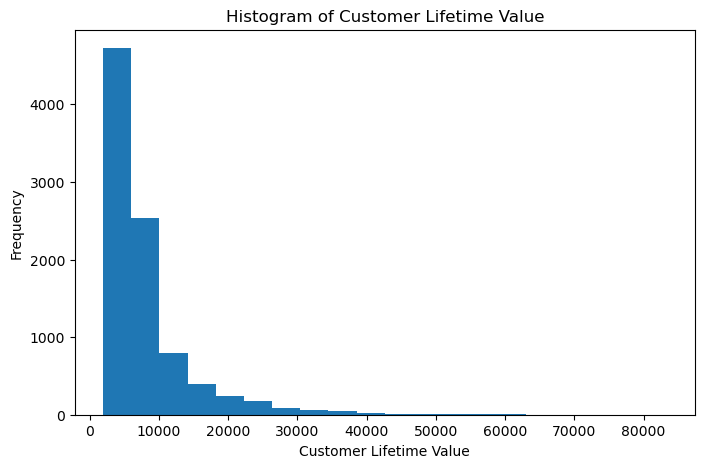

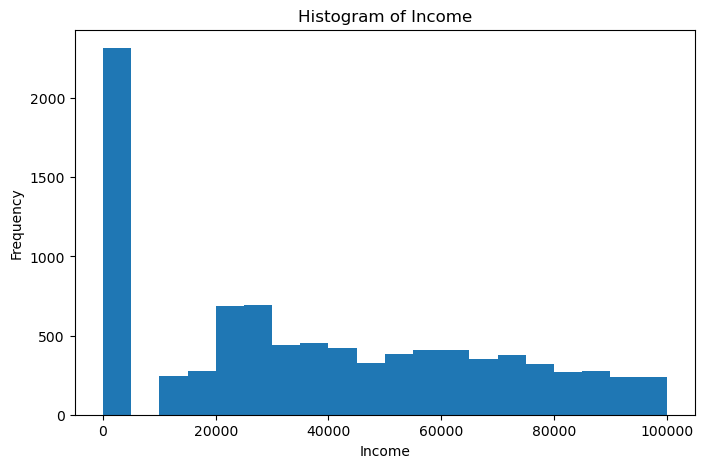

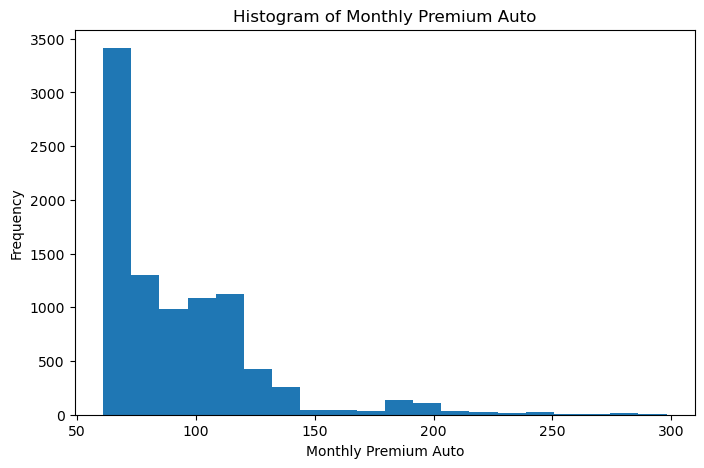

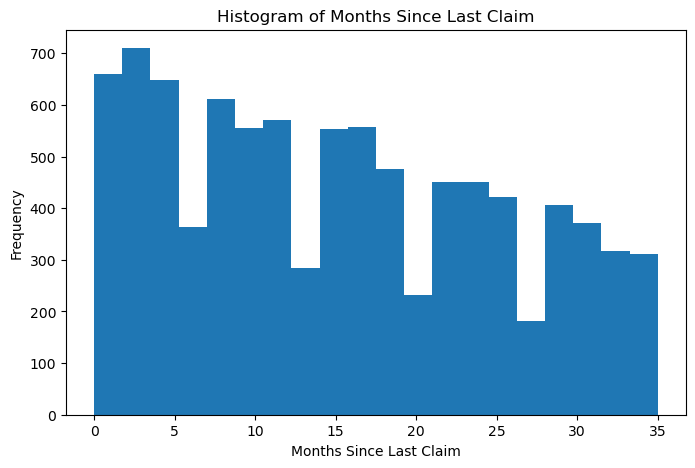

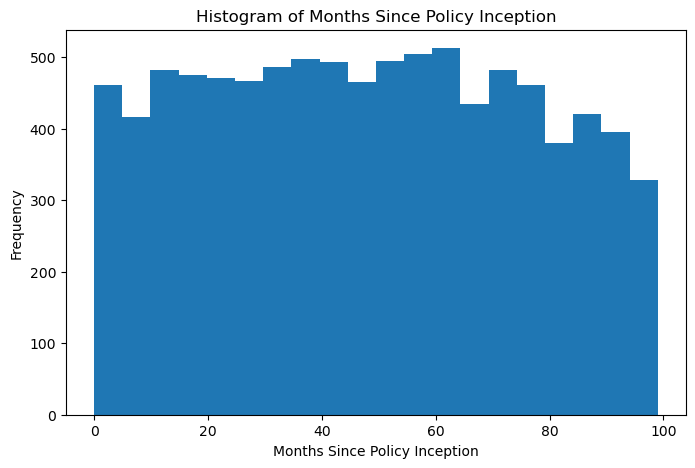

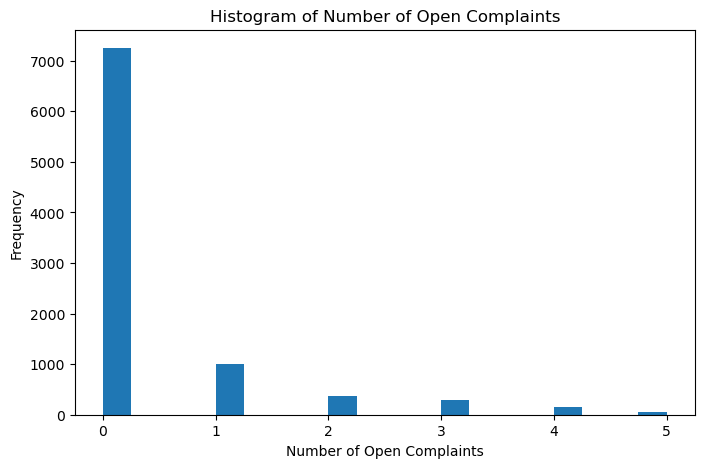

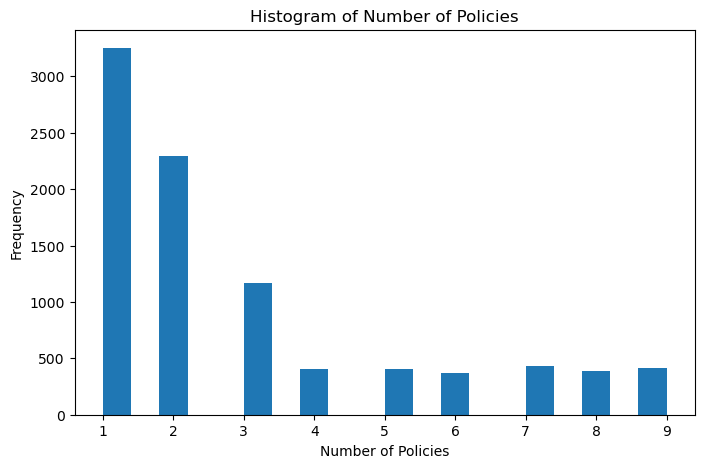

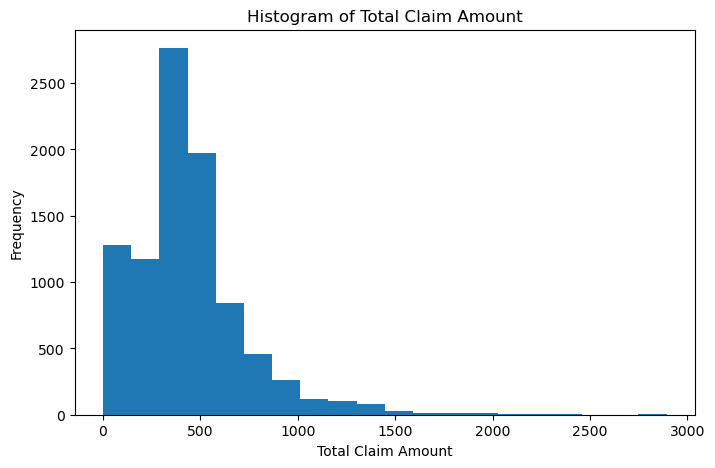

In [7]:
for col in cus_num:
    
    plt.figure(figsize=(8, 5))  
    
    plt.hist(cus_num[col], bins=20)
    
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### 2.3 Do the distributions for different numerical variables look like a normal distribution

In [ ]:
cus_num

In [ ]:
def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [ ]:
for col in cus_num:
    plt.figure(figsize=(7, 4))
    plt.hist(cus_num[col].apply(log_transfom_clean), bins=30)   
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
def log_transform_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

In [ ]:
for col in cus_num:
    
    cus_num[col] = list(map(log_transform_clean2, cus_num[col]))
    cus_num[col] = cus_num[col].fillna(np.mean(cus_num[col]))
    
    plt.figure(figsize=(7, 4))
    plt.hist(cus_num[col].apply(log_transfom_clean), bins=30)   
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

cus_num

I don´t think they could look as normal distributions using the log function. I could cut the values of the total claim amount at 600 but I wouldn´t do that because it provides lot of information. Here is the demonstration:

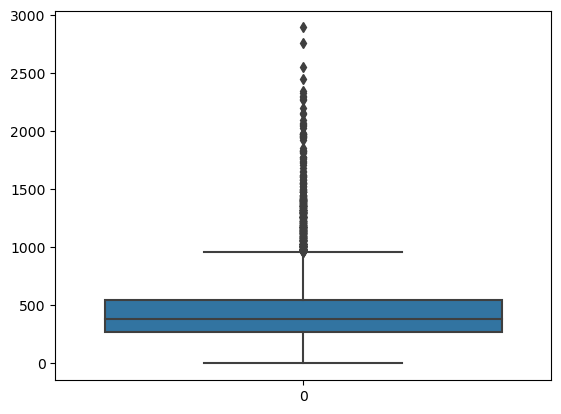

In [47]:
sns.boxplot(cus_num['Total Claim Amount'])
plt.show()

In [31]:
iqr = np.percentile(cus_num['Total Claim Amount'],75) - np.percentile(cus_num['Total Claim Amount'],25)

upper_limit = np.percentile(cus_num['Total Claim Amount'],75) + 1.5*iqr
lower_limit = np.percentile(cus_num['Total Claim Amount'],25) - 1.5*iqr

print(upper_limit)
print(lower_limit)

960.3997301249999
-140.62664687499995


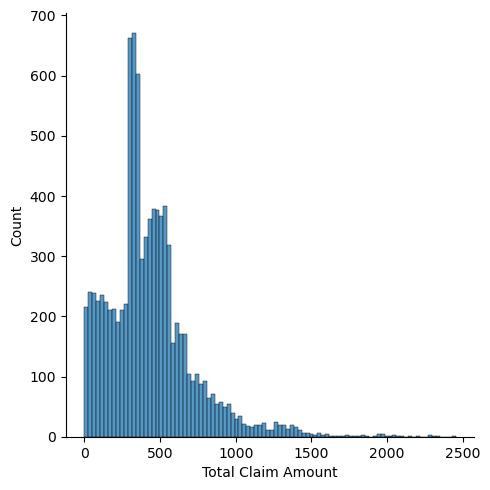

In [52]:
cus_claim = cus_num[(cus_num['Total Claim Amount']>lower_limit)&(cus_num['Total Claim Amount']<2500)]
sns.displot(cus_claim['Total Claim Amount'])
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7100\3203857821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_claim['Total Claim Amount'] = list(map(log_transform_clean2, cus_claim['Total Claim Amount']))
C:\Users\PC\AppData\Local\Temp\ipykernel_7100\3203857821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_claim['Total Claim Amount'] = cus_claim['Total Claim Amount'].fillna(np.mean(cus_claim['Total Claim Amount']))


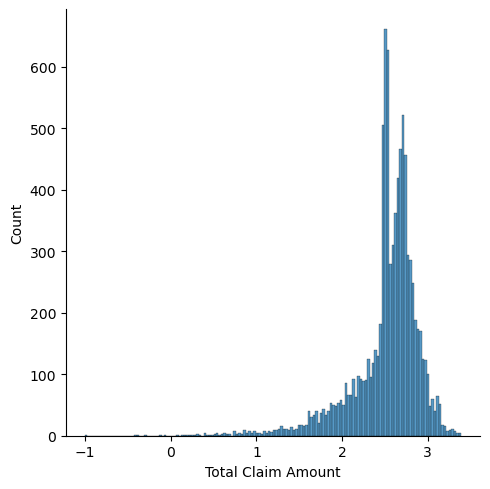

In [53]:
cus_claim['Total Claim Amount'] = list(map(log_transform_clean2, cus_claim['Total Claim Amount']))
cus_claim['Total Claim Amount'] = cus_claim['Total Claim Amount'].fillna(np.mean(cus_claim['Total Claim Amount']))
sns.displot(cus_claim['Total Claim Amount'])
plt.show()

##### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.


In [54]:
# Reset data frame

cus_num = customer.select_dtypes(include = np.number)

In [55]:
# Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other.

# We can create a matrix
correlation_matrix = cus_num.corr()
correlation_matrix


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


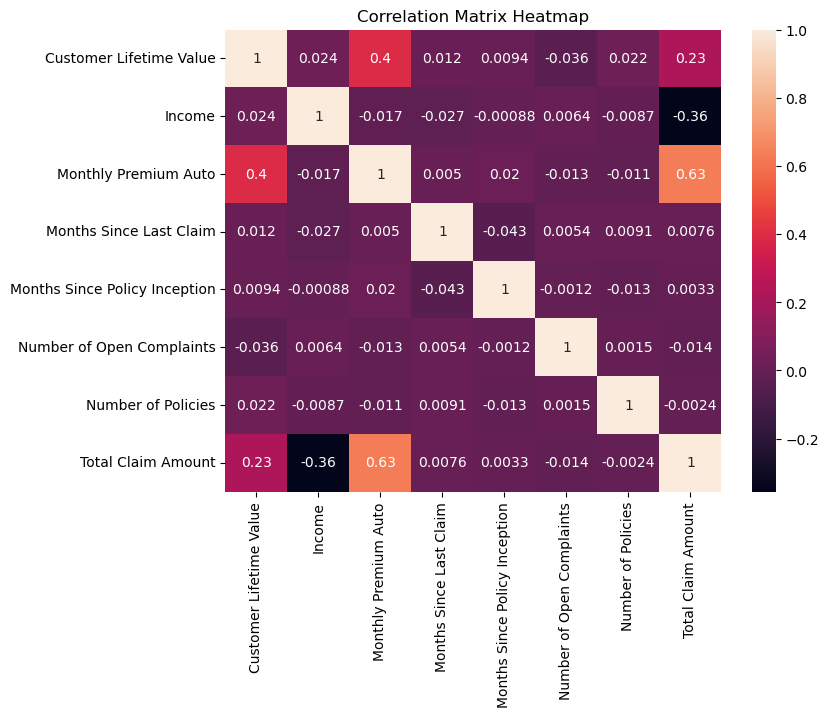

In [56]:
# Or a heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

The values are not very correlated in general.

Looking at the Total Claim Amount, we can say that is quite correlated to the Monthly Premium Auto. The Customer Lifetime Value provides some information with a coefficient of correlation of 0.23.

Also, the income coefficient tells us about a negative correlation, which means that the Total Claim Amount gets higher when the Income amount goes lower.

##### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

I´m going to drop the values with very little correlation.

In [62]:
cus_corr = cus_num.drop(['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies'], axis=1)
cus_corr

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [64]:
correlation_matrix2 = cus_corr.corr()
correlation_matrix2

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.226451
Income,0.024366,1.000000,-0.016665,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.632017
Total Claim Amount,0.226451,-0.355254,0.632017,1.000000


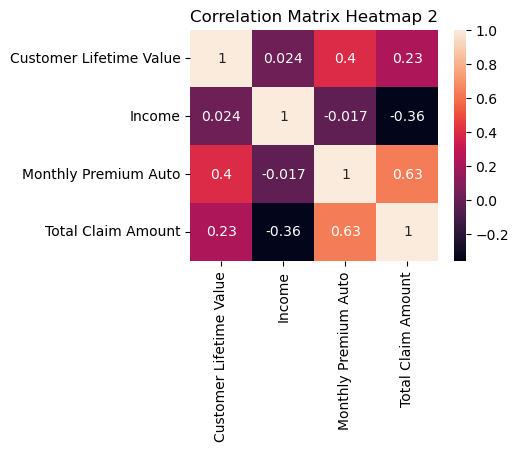

In [66]:
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation Matrix Heatmap 2')
plt.show()

# Lab | Customer Analysis Round 5

### Processing Data

##### 1. Further processing

I will compare the target value against the most correlated one, the Monthly Premium Auto.

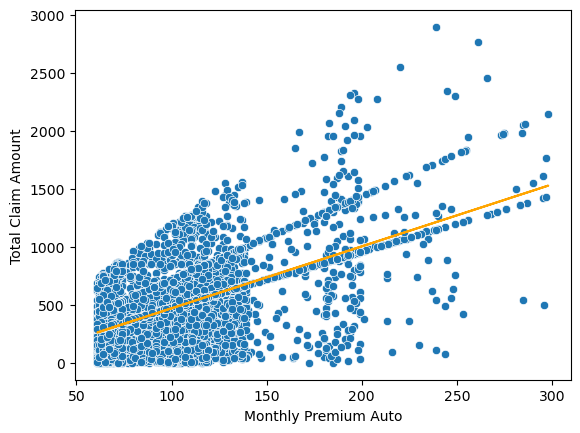

In [72]:
cus_num = customer.select_dtypes(include = np.number)

y = cus_num['Total Claim Amount']
X = cus_num[['Monthly Premium Auto']]

lm = linear_model.LinearRegression()
lm.fit(X,y)

regression_line = lm.intercept_ + lm.coef_[0]*cus_num['Monthly Premium Auto']

plt.plot(cus_num['Monthly Premium Auto'], regression_line, c = 'orange')
sns.scatterplot(x='Monthly Premium Auto',y='Total Claim Amount',data=cus_num)
plt.show()

I´ll check the R2-score

In [88]:
print("R2-score is ", lm.score(X,y))
print("mean squared error (MSE) is ", mean_squared_error(lm.predict(X),y))

R2-score is  0.3994450617021763
mean squared error (MSE) is  50675.464802798284


The R2-socre indicates the model does not explain very well the variance in the target variable.
Also, we can see by the MSE that the model's predictions are not very close to the true values.

##### 2. X-y split.

Already done above

##### 3. Normalize (numerical).

In [92]:
y = cus_num['Total Claim Amount']
X = cus_num.drop(['Total Claim Amount'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized

cus_nor = pd.DataFrame(x_normalized, columns=X_num.columns)

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250
